In [2]:
import pandas as pd
import ast
import json
import glob
import train
import torch
import cv2
import matplotlib.pyplot as plt
import os
import pathlib

In [32]:
print(f'PyTorch version: {torch.__version__}')
print('*'*10)
print(f'_CUDA version: ')
!nvcc --version
print('*'*10)
print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
print(f'Device Name: {torch.cuda.get_device_name()}')

PyTorch version: 1.13.1
**********
_CUDA version: 
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:36:24_Pacific_Standard_Time_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0
**********
CUDNN version: 8302
Available GPU devices: 1
Device Name: NVIDIA GeForce RTX 3060 Ti


In [ ]:
with open() as f:
    lines = f.readlines()

raw_string = ''.join(lines)

In [ ]:
parsed_values = []
decoder = json.JSONDecoder()
while raw_string:
    value, new_start = decoder.raw_decode(raw_string)
    raw_string = raw_string[new_start:].strip()

    parsed_values.append(value)

Get unique label names

In [10]:
class_dict = {'Cow_Available': 0, 'Cow calf_Available': 1, '_Available': 2, 'Gillie Groats_Available': 3, 'Cow_Unavailable': 4, 'Cow calf_Unavailable': 5}

In [ ]:
for parsed_value in parsed_values:
    img_name = parsed_value['imageName']
    img_dir ='.png'
    try:
        image = cv2.imread(img_dir)
    except FileNotFoundError:
        print(f"Image not found at {img_dir}")
        continue
    img_size = image.shape
    with open("", "w") as f:
        for label in parsed_value['labels']: 
            x1 = label['boundingBox']['x']
            y1 = label['boundingBox']['y']
            x2 = label['boundingBox']['x'] + label['boundingBox']['width'] 
            y2 = label['boundingBox']['y'] + label['boundingBox']['height'] 
            x_max = img_size[0]
            y_max = img_size[1]
            x_center = float((x1 + x2)) / 2 / img_size[1]
            y_center = float((y1 + y2)) / 2 / img_size[0]
            w = float((x2 - x1)) / img_size[1]
            h = float((y2 - y1)) / img_size[0]
            class_number = class_dict[label['name']]
            f.write(f"{class_number} {x_center} {y_center} {w} {h}")
            f.write(f"\n")

Sanity check for yolov5 annotations

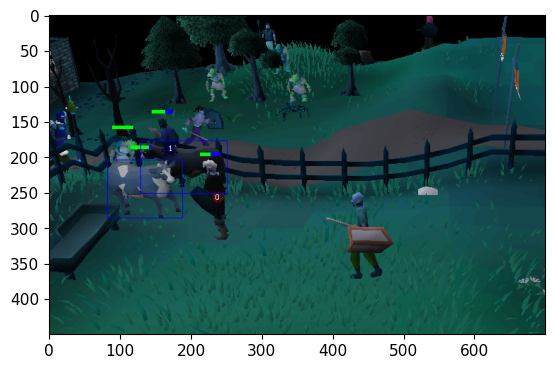

In [14]:
%matplotlib inline
img = cv2.imread()
dh, dw, _ = img.shape

fl = open("", 'r')
data = fl.readlines()
fl.close()

for dt in data:
    _, x, y, w, h = map(float, dt.split(' '))
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img[:450, :700, :])
plt.show()

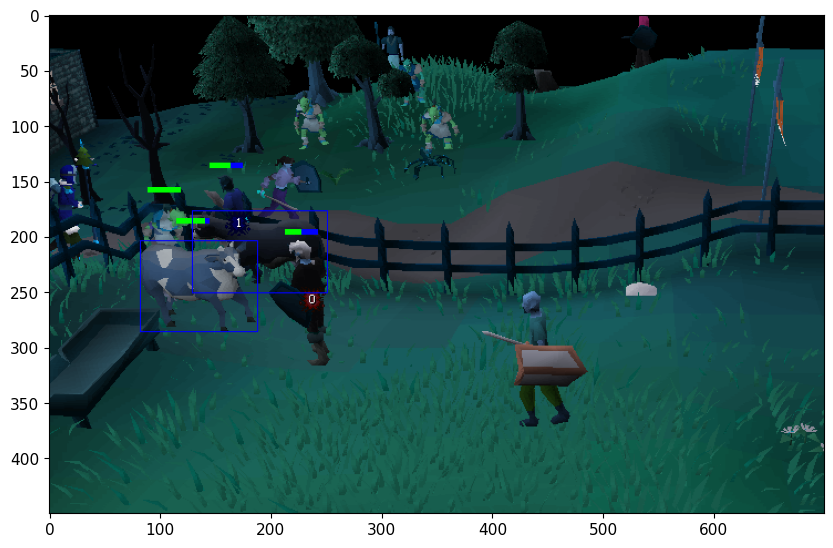

In [15]:
%matplotlib inline
image = cv2.imread()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#Show the image with matplotlib
for bb in parsed_values[0]['labels']:
    x1 = bb['boundingBox']['x']
    y1 = bb['boundingBox']['y']
    x2 = bb['boundingBox']['x'] + bb['boundingBox']['width'] 
    y2 = bb['boundingBox']['y'] + bb['boundingBox']['height'] 
    cv2.rectangle(image, (x1,y1), (x2, y2),
                  color=(0, 255, 0), thickness=3)
plt.figure(figsize= (10,10))
plt.imshow(img[:450, :700, :])
plt.show()
